# <font><center> **Sentiment Analysis for Moroccan Dialect** 


### Reading and Loading the Dataset

In [46]:
import warnings
warnings.simplefilter('ignore')

In [47]:
import  numpy as np
import pandas as pd

train = pd.read_excel("Final_Data.xlsx" )
train.head()

,comment,label
0,العتماني عندو اللباقة و الجدال بالغة سد فمك,0
1,إن كتب لنا الموت بهذا الفيروس فذاك يبقى قضاء و...,0
2,خوتي الله ينجيكم من هاد الفيروس الخبيث يا رب ا...,0
3,الحمد لله على أن ڤيروس كورونا لا يعيش في ما فو...,0
4,و بخصوص الكمامات فهو على صواب الكمامة تحمي فقط...,0


In [48]:
DATA_COLUMN = "comment"
LABEL_COLUMN = "label"

In [49]:
df_MSAC = pd.DataFrame(train, columns=["comment", LABEL_COLUMN])
df_MSAC

,comment,label
0,العتماني عندو اللباقة و الجدال بالغة سد فمك,0
1,إن كتب لنا الموت بهذا الفيروس فذاك يبقى قضاء و...,0
2,خوتي الله ينجيكم من هاد الفيروس الخبيث يا رب ا...,0
3,الحمد لله على أن ڤيروس كورونا لا يعيش في ما فو...,0
4,و بخصوص الكمامات فهو على صواب الكمامة تحمي فقط...,0
...,...,...
4332,هاد الصداع كامل السبب ديالوا كروش الحرام اللي ...,1
4333,هادشي بزاف ياك حبستونا شهرين بلا خدمة مرض كيتص...,1
4334,واحد التمساح عدنا ماعندوا نفس,1
4335,وكلنا عليهم الله هاد المصانع غادي يخليونا فديو...,1


In [50]:
df_MSAC["comment"][225]

'Asi hotman positive dima 😂'

### Preprocessing

### Aransia

In [14]:
from aaransia import transliterate, SourceLanguageError
for i in range(len(df_MSAC)):
    row=df_MSAC.iloc[i]["comment"]
    row=transliterate(row, source='ma', target='ar', universal=True)
    df_MSAC.loc[:,"comment"][i]=row

In [15]:
df_MSAC["comment"][225]

'اسي هوتمان پوسيتيڤ ديما 😂'

### Normalization

In [18]:
import re
#Normalize_the_text:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [19]:
sentences = [normalize_arabic(text) for text in df_MSAC['comment'] ]
df_MSAC['comment']=sentences

### Data cleaning

Text cleaning will include several things:

- removing missing values
- removing punctuation 
- removing numbers 
- removing stopwords

In [21]:
import re
df_MSAC['comment'] = df_MSAC['comment'].str.replace('\d+', ' ')

df_MSAC['comment'] = df_MSAC['comment'].str.replace('\n', ' ')
df_MSAC['comment'] = df_MSAC['comment'].str.replace('/', ' ')
#removes punctuation
df_MSAC['comment']= [re.sub(r'[^\w\s]','',s) for s in df_MSAC['comment']] 
#remove latin characters
df_MSAC['comment']= [re.sub(r'[a-zA-Z ]',' ',s) for s in df_MSAC['comment']] 
df_MSAC['comment'][12]

' الشفافيه و الثقه  لا بد ان تكون الثقه'

### Stopwords

In [22]:
##Common Words

In [23]:
# import necessary libraries
from nltk.corpus import stopwords

In [24]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [25]:
df_MSAC['comment'][12]

' الشفافيه و الثقه  لا بد ان تكون الثقه'

In [26]:
import nltk
stopwords = list(set(nltk.corpus.stopwords.words('arabic')))
df_MSAC["comment"] = df_MSAC["comment"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

### Stemming

In [29]:
from tashaphyne.stemming import ArabicLightStemmer
#Stemmer_LIGHT : Remove suffixes and affixes 
ArListem = ArabicLightStemmer()
def stemmer_light(text):
    text_words = []
    words = text.split(" ")
    for c in words:
        stem = ArListem.light_stem(c)
        text_words.append(stem)
    return ' '.join(text_words)

#Root Stemming :  Transform the wrod into its root form
def stemmer_root(text):
    text_words = []
    words = text.split(" ")
    for c in words:
        stem = ArListem.light_stem(c)
        text_words.append(stem)
    return ' '.join(text_words)




In [30]:
sentences = [stemmer_light(text) for text in df_MSAC['comment']]

In [31]:
df_MSAC['comment']=sentences
df_MSAC['comment'][12]

'شفافيه ثقه بد ان كو ثقه'

In [32]:
#we need to create a document term matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in  vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [33]:
#We inspect the top word in a sample from our corpus without stemming the words
from pprint import pprint
topWords=get_top_n_words(df_MSAC['comment'],n=20)
pprint(topWords)

[('له', 1358),
 ('عل', 1220),
 ('ان', 913),
 ('حال', 791),
 ('لا', 646),
 ('عد', 574),
 ('را', 571),
 ('ناس', 569),
 ('هاد', 501),
 ('اش', 473),
 ('حمد', 450),
 ('مغرب', 428),
 ('ديال', 398),
 ('صح', 381),
 ('حجر', 381),
 ('حت', 377),
 ('سب', 338),
 ('نا', 332),
 ('على', 320),
 ('مرض', 296)]


### Word Cloud


In [35]:
pip install bidi

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement bidi (from versions: none)
ERROR: No matching distribution found for bidi


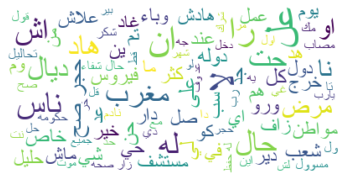

In [36]:
import nltk
#nltk.download('stopwords')
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#stopwords= pd.read_excel("stop_words_Arabic.xlsx")
arab_stopwords = list(set(nltk.corpus.stopwords.words("arabic")))
sample_corpus=' '.join(df_MSAC['comment'])
data = arabic_reshaper.reshape(sample_corpus)
data = get_display(data) # add this  
wordcloud = WordCloud(font_path = 'arial.ttf',stopwords = arab_stopwords, background_color = "white", max_font_size = 50, max_words = 100).generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Then we remove Arabic Stopwords and regenerate wordcloud

## Sentiment Analysis classifier

### Creating training dataset for the classifier


In [37]:
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
all_datasets= []

In [38]:
print(df_MSAC[LABEL_COLUMN].value_counts())
label_list_MSAC = list(df_MSAC[LABEL_COLUMN].unique())

1    2899
0    1438
Name: label, dtype: int64


### DecisionTree with CountVectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Modèle 1
df_MSAC.columns = [DATA_COLUMN, LABEL_COLUMN]

#train_MSAC, test_MSAC = train_test_split(df_MSAC, test_size=0.2, random_state=42)

# Vectorisation des critiques
vectorizer = CountVectorizer(max_features=256)
X = vectorizer.fit_transform(df_MSAC[DATA_COLUMN])
y = df_MSAC[LABEL_COLUMN]

# Séparation des données en 2 parties : entraînement / Test
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2,random_state=42)
# Entraînement du modèle
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree = decision_tree.fit(train_X, train_y)
predictions = decision_tree.predict(val_X)
print('Score (=accuracy) du modèle decision_tree avec CountVectorizer sur le jeu de test : ', round(accuracy_score(val_y, predictions) * 100, 2), '%')

Score (=accuracy) du modèle decision_tree avec CountVectorizer sur le jeu de test :  74.42 %


In [40]:
vectorizer = CountVectorizer()
vectorizer.fit(df_MSAC[DATA_COLUMN])
vocab_size = len(vectorizer.vocabulary_)
print(f'Il y a {vocab_size} mots différents dans notre corpus.')

Il y a 11031 mots différents dans notre corpus.


### DecisionTree with TfidfVectorizer 

In [41]:

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import random
# Train the classifier
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df_MSAC[DATA_COLUMN])
y = df_MSAC[LABEL_COLUMN]

train_X, val_X, train_y, val_y = train_test_split(X, y,  test_size=0.2,random_state=42)
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree = decision_tree.fit(train_X, train_y)
predictions = decision_tree.predict(val_X)
print('Score (=accuracy) du modèle decision_tree avec TfidfVectorizer sur le jeu de test : ', round(accuracy_score(predictions,val_y) * 100, 2), '%')

Score (=accuracy) du modèle decision_tree avec TfidfVectorizer sur le jeu de test :  78.0 %


### SVM

In [42]:
#modéle SVM
from sklearn import svm
train_X, val_X, train_y, val_y = train_test_split(X, y,  test_size=0.2,random_state=42)
lin_clf = svm.LinearSVC()
lin_cl=lin_clf.fit(train_X, train_y)
predictions = lin_cl.predict(val_X)
print('Score (=accuracy) du modèle svm  sur le jeu de test : ', round(accuracy_score(predictions,val_y) * 100, 2), '%')

Score (=accuracy) du modèle svm  sur le jeu de test :  84.33 %


### Naive bayes with CountVectorizer

In [43]:
import nltk
import random
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train the classifier
vectorizer = CountVectorizer(max_features=2000)
X = vectorizer.fit_transform(df_MSAC[DATA_COLUMN])
y = df_MSAC[LABEL_COLUMN]

# Séparation des données en 2 parties : entraînement / test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=42)
# Entraînement du modèle
mnb = MultinomialNB()
mnb.fit(train_X, train_y)

# Test the classifier
predictions = pd.Series(mnb.predict(test_X))
print('Score (=accuracy) du modèle  sur le jeu de test : ', round(accuracy_score(test_y, predictions) * 100, 2), '%')


Score (=accuracy) du modèle  sur le jeu de test :  83.29 %


### Naive bayes with TfidfVectorizer

In [44]:
# Modèle3 naive_bayes
import nltk
import random
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

# Train the classifier
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df_MSAC[DATA_COLUMN])
y = df_MSAC[LABEL_COLUMN]

train_X, val_X, train_y, val_y = train_test_split(X, y,  test_size=0.2,random_state=42)
mnb = MultinomialNB()
mnb.fit(train_X, train_y)

# Test the classifier
predictions = pd.Series(mnb.predict(val_X))
print('Score (=accuracy) du modèle  sur le jeu de test : ', round(accuracy_score(val_y, predictions) * 100, 2), '%')

Score (=accuracy) du modèle  sur le jeu de test :  83.99 %


### Random forest 

In [45]:
#modèle random forest 
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(max_depth=2, random_state = 42)
# Train the model on training data
randomforest=rf.fit(train_X, train_y);
predictions = randomforest.predict(val_X)
print('Score (=accuracy) du modèle decision_tree avec TfidfVectorizer sur le jeu de test : ', round(accuracy_score(predictions,val_y) * 100, 2), '%')

Score (=accuracy) du modèle decision_tree avec TfidfVectorizer sur le jeu de test :  63.82 %
